<a href="https://colab.research.google.com/github/mahilohiya/ml-projects/blob/main/Untitled10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('housing_prices.csv', sep=',')
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41,6.9841,1.0238,322,2.5556,37.88,-122.23,452600
1,8.3014,21,6.2381,0.9719,2401,2.1098,37.86,-122.22,358500
2,7.2574,52,8.2881,1.0734,496,2.8023,37.85,-122.24,352100
3,5.6431,52,5.8174,1.0731,558,2.5479,37.85,-122.25,341300
4,3.8462,52,6.2819,1.0811,565,2.1815,37.85,-122.26,342200


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      10 non-null     float64
 1   HouseAge    10 non-null     int64  
 2   AveRooms    10 non-null     float64
 3   AveBedrms   10 non-null     float64
 4   Population  10 non-null     int64  
 5   AveOccup    10 non-null     float64
 6   Latitude    10 non-null     float64
 7   Longitude   10 non-null     float64
 8   Price       10 non-null     int64  
dtypes: float64(6), int64(3)
memory usage: 852.0 bytes


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,4.996080,46.800000,5.655340,1.029030,976.300000,2.341930,37.850000,-122.253000,314480.000000
std,2.243359,10.064238,1.310035,0.051432,648.036702,0.235037,0.012472,0.018886,68355.310287
min,2.080400,21.000000,4.295000,0.951200,322.000000,2.109800,37.840000,-122.280000,226700.000000
25%,3.667125,44.500000,4.659225,0.993750,511.500000,2.149700,37.840000,-122.267500,263250.000000
50%,3.941500,52.000000,5.374650,1.020400,829.500000,2.266550,37.850000,-122.255000,320250.000000
75%,6.853825,52.000000,6.270950,1.073325,1193.750000,2.519175,37.850000,-122.242500,349625.000000
max,8.325200,52.000000,8.288100,1.103800,2401.000000,2.802300,37.880000,-122.220000,452600.000000


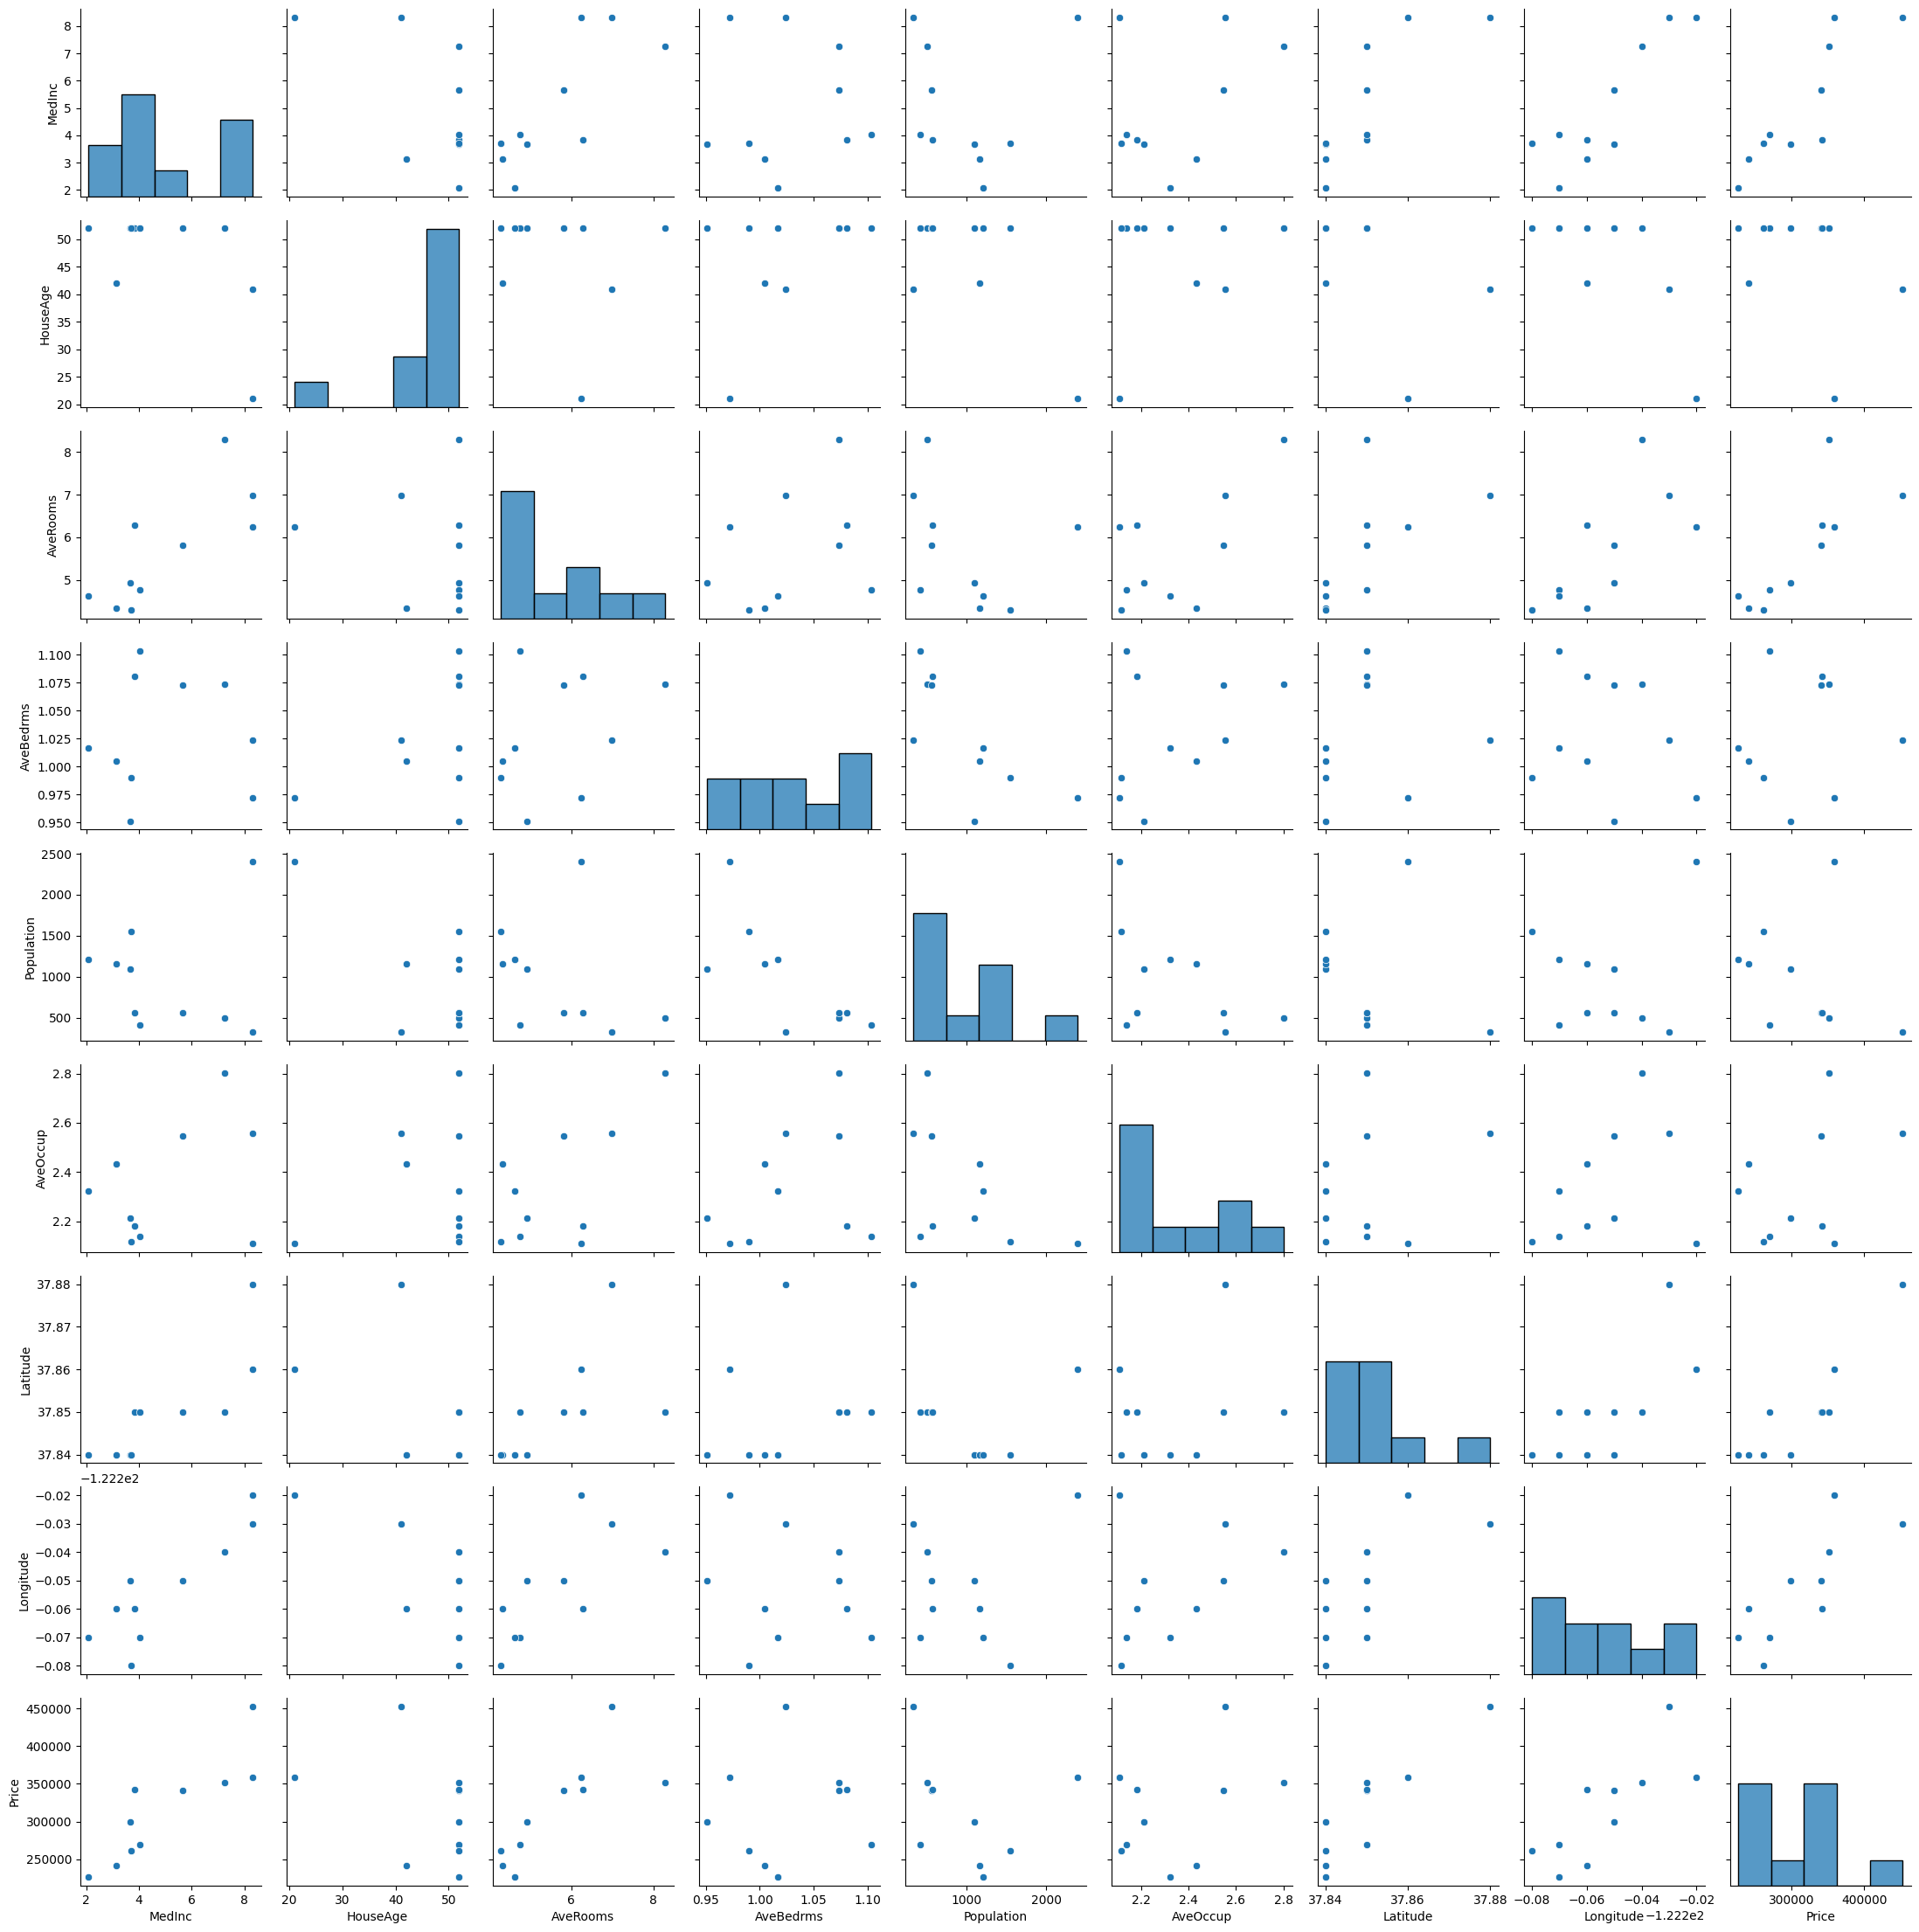

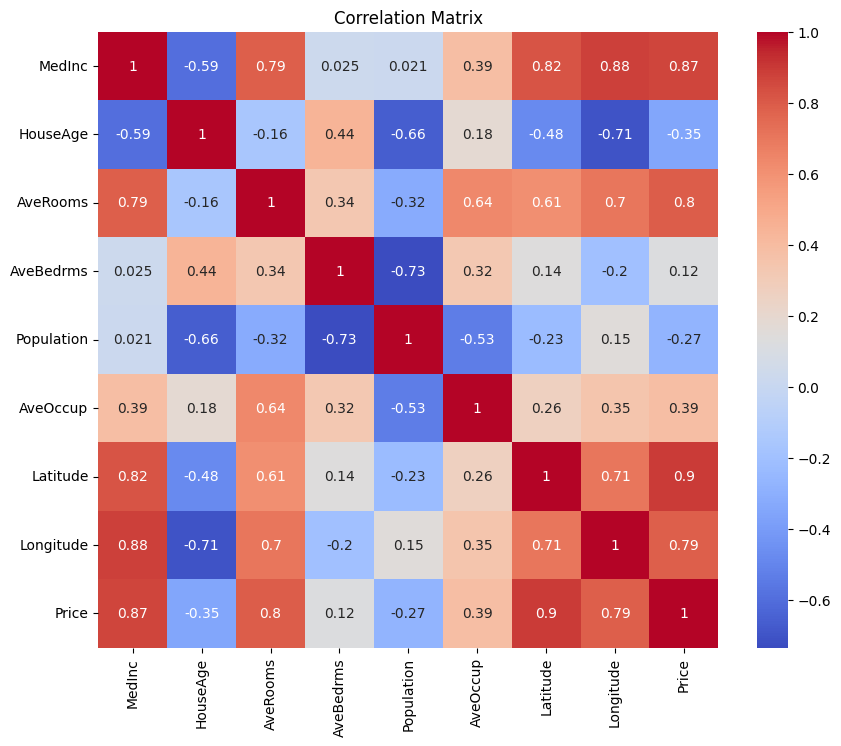

In [ ]:
sns.pairplot(df)
plt.show()

cm =df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


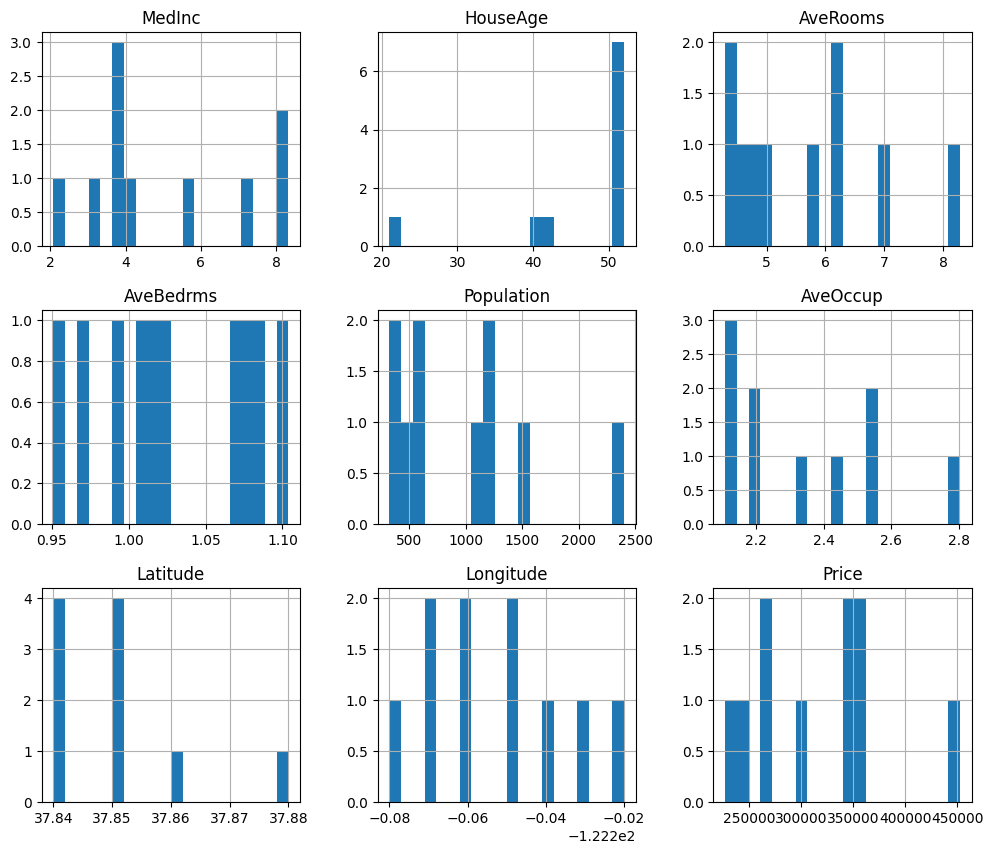

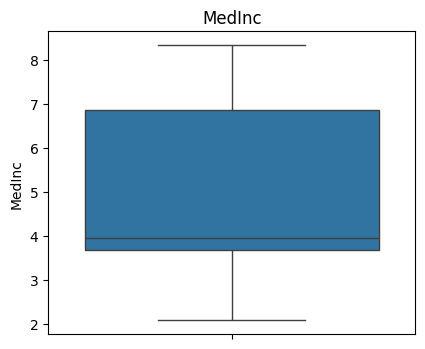

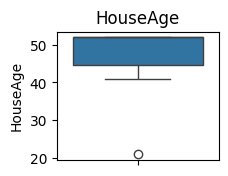

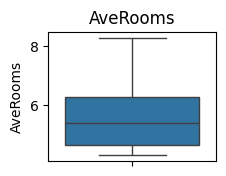

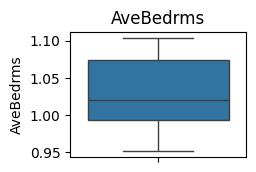

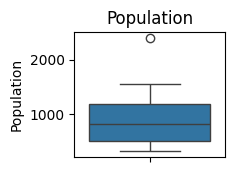

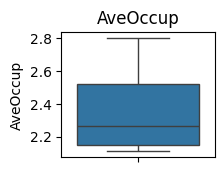

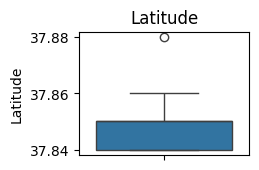

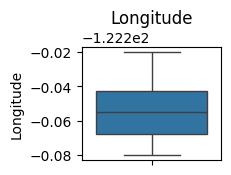

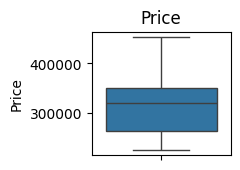

In [ ]:
df.hist(figsize=(12,10), bins=20)
plt.show()

plt.figure(figsize=(12,10))
for i, column in enumerate(df.columns):
    plt.subplot(3,3,i+1)
    sns.boxplot(df[column])
    plt.title(column)
    plt.tight_layout()
    plt.show()

In [ ]:
x = df[['MedInc']] #independent
y = df[['Price']] #dependent

In [ ]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 2160482976.4945397
R-squared: 0.5025149669235955


In [20]:
medinc_value =float(input("enter the MedInc value: "))
medinc_value_array = np.array([medinc_value])
predicted_price=model.predict(medinc_value_array.reshape(-1,1))
print(f'Predicted Price: {predicted_price[0][0]}')

enter the MedInc value: 7.2
Predicted Price: 389897.77986315114


In [24]:
#Multi-Linear regression
x_multi = df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
y_multi = df[['Price']]

x_train_multi, x_test_multi, y_train_multi, y_test_multi =train_test_split(x_multi, y_multi, test_size=0.2, random_state=42)

multi_model = LinearRegression()
multi_model.fit(x_train_multi, y_train_multi)

y_pred_multi = multi_model.predict(x_test_multi)

mse = mean_squared_error(y_test_multi, y_pred_multi)
r2 = r2_score(y_test_multi, y_pred_multi)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 75414742659.04794
R-squared: -16.36542530275281


In [26]:
coefficients = pd.DataFrame(multi_model.coef_.T , x_multi.columns, columns=['Coefficient'])
intercept = multi_model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients:              Coefficient
MedInc     -1.132656e+04
HouseAge    5.874901e+03
AveRooms    1.043191e+02
AveBedrms   1.322487e+06
Population  2.354500e+02
AveOccup   -1.008811e+05
Latitude    6.344625e+06
Longitude   6.869201e+06
Intercept: [5.98421431e+08]
